# Measuring the Josephson Current, the gap voltage and the normal state resistance at 1152ohm 
** **
 * This project uses the lmfit package. Lmfit provides curve fiting using non-linear least squares minimization and was developed by Matt Newville: https://github.com/newville.

## Install and import libraries

In [1]:
#uncomment the following line to install lmfit
#!pip install lmfit

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from lmfit.models import LinearModel
import math

## Data

In [3]:
#Load the data
df = pd.read_csv("./Data/1152_one_pass.csv", sep = " ", header = None)

#Preview the data
df.head()

,0,1,2
0,8.346,63.9353,0.00323
1,8.234,62.5955,0.00316
2,7.979,60.7257,0.00307
3,7.782,59.4807,0.00301
4,7.612,57.7241,0.00292


## Data wrangling

In [4]:
#Ascribe the columns to the V and I varibles 
V = list(df[0])
I = list(df[1])

#Preview the data
print("V = ", V)
print("I = ", I )

V =  [8.346, 8.234, 7.979, 7.782, 7.612, 7.414, 7.231, 7.033, 6.849, 6.659, 6.496, 6.27, 6.122, 5.967, 5.762, 5.557, 5.416, 5.232, 5.056, 4.901, 4.724, 4.569, 4.399, 4.258, 4.046, 3.905, 3.728, 3.552, 3.326, 2.987, 2.987, 2.959, 2.966, 2.945, 2.945, 2.945, 2.916, 2.93, 2.902, 2.895, 2.909, 2.888, 2.888, 2.874, 2.874, 2.846, 2.832, 2.803, 0.113, 0.092, 0.099, 0.092, 0.106, 0.12, 0.099, 0.099, 0.099, 0.106, 0.099, -2.712, -2.712, -2.712, -2.712, -2.726, -2.74, -2.726, -2.754, -2.761, -3.149, -3.354, -3.517, -3.7, -3.863, -4.039, -4.187, -4.406, -4.562, -4.759, -4.922, -5.098, -5.275, -5.48, -5.663, -5.84, -6.023, -6.221, -6.419, -6.595, -6.8, -6.998, -7.224, -7.407, -7.619, -7.831, -8.128, -7.76, -7.386, -7.075, -6.744, -6.447, -6.108, -5.769, -5.465, -5.183, -4.894, -4.632, -4.279, -4.039, -3.743, -3.474, -2.938, -2.817, -2.796, -2.796, -2.782, -2.754, -2.74, -2.754, -2.726, -2.712, -2.712, -2.655, 0.057, 0.021, 0.057, 0.035, 0.042, 0.042, 0.057, 2.846, 2.846, 2.867, 2.874, 2.902, 2.916

In [5]:
lower_limit = V.index(0.021) + 5
upper_limit = V.index(5.593)

print(lower_limit)
print(upper_limit)

128
143


In [6]:
#Remove the data above the chosen upper limit to enhance the view and focus on the single forward pass
V = np.array(V[lower_limit:upper_limit])

I = np.array(I[lower_limit:upper_limit])

#Preview the new subsets
print("V = ", V)
print("I = ", I)

V =  [0.057 2.846 2.846 2.867 2.874 2.902 2.916 3.446 3.735 3.99  4.258 4.477
 4.766 5.021 5.345]
I =  [11.3896 13.0247 15.104  16.9807 19.1029 21.1105 22.9183 25.1463 27.0918
 29.4481 31.2169 33.6134 35.7206 38.0373 40.1063]


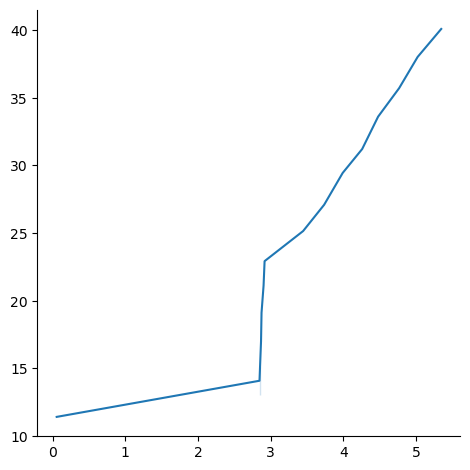

In [7]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Preview the data
sns.relplot(x = V, y = I, kind = "line")

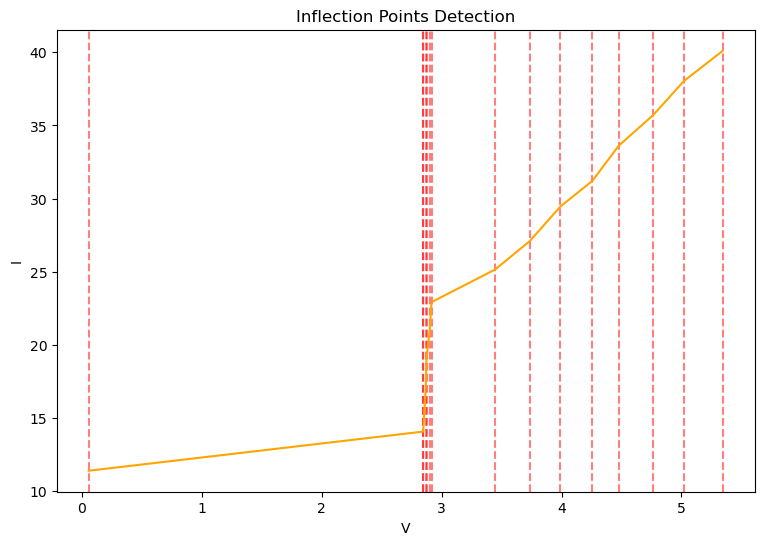

In [8]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the data
V = np.array(V)
I = np.array(I)


# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Mark the change points on the plot
for point in change_points:
    plt.axvline(V[point], color='r', linestyle='--', alpha=0.5)

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

### Clear the graph above to focus on Ic and Vc

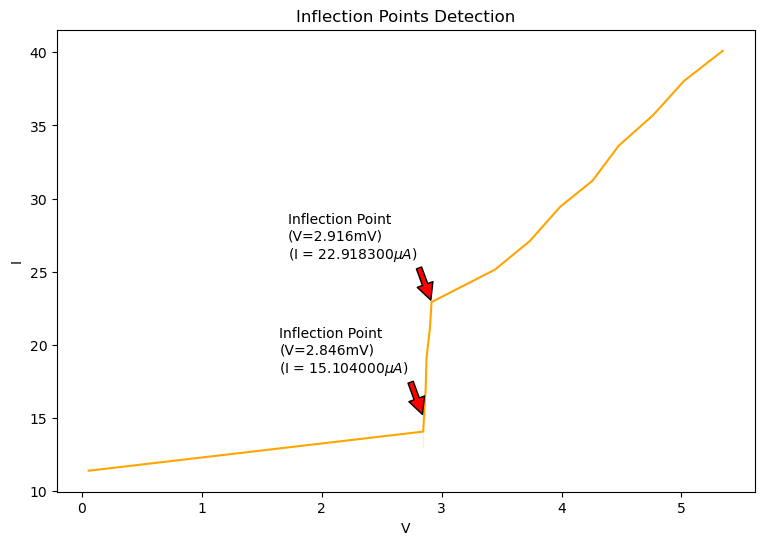

In [9]:
#Uncomment the line below to make the graph interactive
#%matplotlib widget

#Set figure size
plt.figure(figsize=(9,6))

# Define the window size
window_size = 6

# Calculate the moving averages
V_avg = np.convolve(V, np.ones(window_size)/window_size, mode='same')
I_avg = np.convolve(I, np.ones(window_size)/window_size, mode='same')

# Calculate the standard deviations
V_std = np.std(V)
I_std = np.std(I)

# Calculate the z-scores
V_z = (V - V_avg) / V_std
I_z = (I - I_avg) / I_std

# Calculate the change points
change_points = []
for i in range(len(V_z)):
    if abs(V_z[i]) > 3 or abs(I_z[i]) > 0.01:
        change_points.append(i)

# Annotate inflection points on the graph
for idx, point in enumerate(change_points):
    if idx in [1, 6]:
        plt.annotate(f'Inflection Point\n(V={V[point]:.3f}mV)\n(I = {np.interp(V[point], V, I):3f}$\mu A$)', 
                     xy=(V[point], np.interp(V[point], V, I)),
                     xytext=(V[point] - 1.2, np.interp(V[point], V, I) + 3),
                     arrowprops={'facecolor': 'red', 'shrink': 0.05})

    
# Plot the data again
sns.lineplot(x=V, y=I, color = 'orange')  
    
# Set plot labels and title
plt.xlabel('V')
plt.ylabel('I')
plt.title('Inflection Points Detection')

# Show the plot
plt.show()

# Estimating the normal state resistance (Rn)

In [10]:
#Preview the main dataset
print(list(df[0]))

[8.346, 8.234, 7.979, 7.782, 7.612, 7.414, 7.231, 7.033, 6.849, 6.659, 6.496, 6.27, 6.122, 5.967, 5.762, 5.557, 5.416, 5.232, 5.056, 4.901, 4.724, 4.569, 4.399, 4.258, 4.046, 3.905, 3.728, 3.552, 3.326, 2.987, 2.987, 2.959, 2.966, 2.945, 2.945, 2.945, 2.916, 2.93, 2.902, 2.895, 2.909, 2.888, 2.888, 2.874, 2.874, 2.846, 2.832, 2.803, 0.113, 0.092, 0.099, 0.092, 0.106, 0.12, 0.099, 0.099, 0.099, 0.106, 0.099, -2.712, -2.712, -2.712, -2.712, -2.726, -2.74, -2.726, -2.754, -2.761, -3.149, -3.354, -3.517, -3.7, -3.863, -4.039, -4.187, -4.406, -4.562, -4.759, -4.922, -5.098, -5.275, -5.48, -5.663, -5.84, -6.023, -6.221, -6.419, -6.595, -6.8, -6.998, -7.224, -7.407, -7.619, -7.831, -8.128, -7.76, -7.386, -7.075, -6.744, -6.447, -6.108, -5.769, -5.465, -5.183, -4.894, -4.632, -4.279, -4.039, -3.743, -3.474, -2.938, -2.817, -2.796, -2.796, -2.782, -2.754, -2.74, -2.754, -2.726, -2.712, -2.712, -2.655, 0.057, 0.021, 0.057, 0.035, 0.042, 0.042, 0.057, 2.846, 2.846, 2.867, 2.874, 2.902, 2.916, 3.4

In [11]:
#The dataset includes points from two complete sweeps
#Identify the index of the approximate limits of the normal state on the positive side of the graph 

def find_last_occurrence(value, list):
    for i, item in enumerate(list):
        if item == value:
            last_occurrence = i
    return last_occurrence

low_limit = find_last_occurrence(2.916, list(df[0])) #the second change point above
up_limit = list(df[0]).index(df[0][len(df[0]) - 1])

print(low_limit)
print(up_limit) 

134
152


In [12]:
#Select data from the first pass
V_n = np.array(df[0][low_limit:up_limit])
I_n = np.array(df[1][low_limit:up_limit])

#Preview the data
print(V_n)
print(I_n)

[2.916 3.446 3.735 3.99  4.258 4.477 4.766 5.021 5.345 5.593 5.91  6.186
 6.468 6.793 7.118 7.414 7.725 8.05 ]
[22.9183 25.1463 27.0918 29.4481 31.2169 33.6134 35.7206 38.0373 40.1063
 42.7184 44.6776 47.1682 49.6172 51.983  54.2764 56.7759 59.212  61.9338]


## Define the model and fit the data

In [13]:
#Define the variables and convert to Volts and Amps
x = V_n / 0.001
y = I_n / 0.000001

#Use builtin NameModel, specify prefix for each:
mod = LinearModel(prefix='') 

#Set the initial parameters to 'guess' mode
pars  = mod.guess(y, x = x)

#Fit with weights=1/yerr
result = mod.fit(y, pars, x = x, weights= 1. / (y * 0.0196))

#Print the fit results
print(result.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 18
    # variables        = 2
    chi-square         = 16.1131586
    reduced chi-square = 1.00707241
    Akaike info crit   = 2.00676076
    Bayesian info crit = 3.78750427
    R-squared          = 1.00000000
[[Variables]]
    slope:      7765.03179 +/- 122.498868 (1.58%) (init = 7876.832)
    intercept: -1091862.39 +/- 592882.124 (54.30%) (init = -1655938)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.9583


## Plot the model

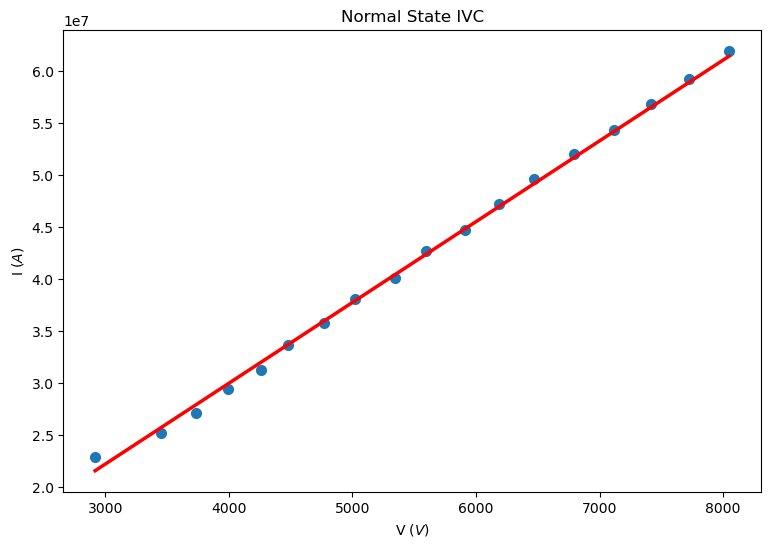

In [14]:
#Set the figure size
plt.figure(figsize = (9,6))

#Plot the data and the model
plt.scatter(x, y, linewidth=2)
plt.plot(x, result.best_fit, 'r-', linewidth=2.5)

# Set plot labels and title
plt.xlabel('V ($V$)')
plt.ylabel('I ($A$)')
plt.title('Normal State IVC')

#Show the plot
plt.show()

# Calculating the theoretical Ic and V_gap

![](./img/Ic_formula.png)

In [15]:
#Access the model parameters
varys = result.params.valuesdict()

varys

{'slope': 7765.0317948544125, 'intercept': -1091862.3854621607}

In [16]:
#The slope is equal to 1 / R 
R_n = 1 / varys.get("slope")

print('Normal state resistance: R_n = ', round(R_n, 6), 'Ohm') 

Normal state resistance: R_n =  0.000129 Ohm


In [17]:
#Define the terms for the strong and weak coupling formulas 
t_c = 9.25 #critical temperature
delta_0 = 2.25288819E-22 # from 1.764 * k_B * t_c,  [check eqn. 1 on the report paper] 
t = 4.76307726 #from the calibration curve in notebook 2
e = 1.6022E-19 #elementay charge
pi = 3.14159265358979323846264338327950 
t_red = t / t_c #the reduced temperature
k_B = 1.3807E-23 #Boltzmann constant
R_n = 1 / varys.get("slope") #from the slope of the IVC


#weak coupling formula

delta_weak = delta_0 * 1.74 * math.sqrt(1.0 - t_red)

E_weak = delta_weak * 2

V_weak = (E_weak / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_weak = (pi / 2) * (delta_weak / (e * R_n)) * math.tanh(delta_weak / (2 * k_B * t))


#strong coupling approximation

delta_strong = (delta_0) * math.sqrt(math.cos((pi * t_red**2)  / 2 )) 

E_strong = delta_strong * 2

V_strong = (E_strong / e) * 1000

#The Ambegaokar-Baratoff formula
Ic_strong = (pi / 2) * (delta_strong / (e * R_n)) * math.tanh(delta_strong / (2 * k_B * t))


#Print the results
print('Temperature =', t, 'K')
print('-----------------------------')
print('-----------------------------')
                         
print('Weak Coupling Formula')
print('-----------------------------')


print('delta_t =', delta_weak, 'J')
print('Gap Energy =', E_weak, 'J')
print('Gap Voltage =', V_weak, 'mV')
print('Josephson Current =', Ic_weak, 'uA')
print('______________________________')
print('______________________________')
print('------------------------------')
print('Strong Coupling Approximation')
print('------------------------------')

print('delta_t =', delta_strong, 'J')
print('Gap Energy = ', E_strong, 'J')
print('Gap Voltage =', V_strong, 'mV')
print('Josephson Current =', Ic_strong, 'uA')
print('________________________________')
print('________________________________')
print('________________________________')

Temperature = 4.76307726 K
-----------------------------
-----------------------------
Weak Coupling Formula
-----------------------------
delta_t = 2.7301865074924784e-22 J
Gap Energy = 5.460373014984957e-22 J
Gap Voltage = 3.4080470696448364 mV
Josephson Current = 20.140272507956993 uA
______________________________
______________________________
------------------------------
Strong Coupling Approximation
------------------------------
delta_t = 2.1544394649972224e-22 J
Gap Energy =  4.308878929994445e-22 J
Gap Voltage = 2.6893514729711927 mV
Josephson Current = 15.20727607182236 uA
________________________________
________________________________
________________________________


In [18]:
#Add all the collected results to a dictionary
Josephson_data = {"Ic" : np.interp(V[6], V, I) , "Ic_weak" : round(Ic_weak, 4), "Ic_strong" : round(Ic_strong, 4), "V_gap" : V[1], "Vg_weak" : round(V_weak, 4), "Vg_strong" : round(V_strong, 4), "Temp" : round(t, 4)}

#Preview the newly created row of data
print(Josephson_data)

{'Ic': 22.9183, 'Ic_weak': 20.1403, 'Ic_strong': 15.2073, 'V_gap': 2.846, 'Vg_weak': 3.408, 'Vg_strong': 2.6894, 'Temp': 4.7631}


## Export the results to a csv file

In [19]:
# import csv

# with open(r'./Data/Josephson_data.csv', 'a', newline='') as csvfile:
#     fieldnames = ['Ic','Ic_weak', 'Ic_strong', 'V_gap', 'Vg_weak', 'Vg_strong', 'Temp']
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

#     writer.writerow(Josephson_data)

## Author
** **

### <a href="https://www.linkedin.com/in/alin-airinei/">Alin Airinei</a>